In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install rioxarray
import xarray as xr
import rioxarray as rxr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 78.5 MB/s eta 0:00:00


In [3]:
!ls drive/MyDrive/long_ndui/

 albuquerque		'Copy of best_model_swinir.pth'   la			    minneapolis
 austin			 denver				  Las_Vegas		    portland
 best_model_swinir.pth	 ds_dmsp_1992_2023_austin.nc	  long_dmsp_11_cities.csv   seattle
 best_weight		 ds_dmsp_1992_2023_LasVegas.nc	  long_dmsp_9_cities.csv    washington_DC
 columbus		 kansas_city			  louisville


In [4]:
df = pd.read_csv('/content/drive/MyDrive/long_ndui//long_dmsp_9_cities.csv')
print(df)

            Name      lat       lon
0    albuquerque  35.0844 -106.6504
1         austin  30.2672  -97.7431
2       columbus  39.9612  -82.9988
3    kansas_city  39.0997  -94.5786
4      Las_Vegas  36.1716 -115.1391
5    minneapolis  44.9778  -93.2650
6       portland  45.5152 -122.6784
7        seattle  47.6061 -122.3328
8  washington_DC  38.9072  -77.0369


In [5]:
city_name=[]
for i in range(len(df.Name)):
  city = str(df.Name[i])
  city_name.append(city)
city_name

['albuquerque',
 'austin',
 'columbus',
 'kansas_city',
 'Las_Vegas',
 'minneapolis',
 'portland',
 'seattle',
 'washington_DC']

In [6]:
du=[]
for i in range(len(df.Name)):
    du1 = xr.open_dataset('/content/drive/MyDrive/long_ndui/'+city_name[i]+'/ndui_'+city_name[i]+'_1999_2022.nc')
    du2 = du1.rename({'ndui':'ndui_'+str(city_name[i])}).mean(['lat', 'lon'])
    du.append(du2)

In [7]:
du[0]

<xarray.Dataset> Size: 384B
Dimensions:           (time: 24)
Coordinates:
  * time              (time) datetime64[ns] 192B 1999-01-01 ... 2022-01-01
Data variables:
    ndui_albuquerque  (time) float64 192B 0.3073 0.3762 0.341 ... 0.4103 0.3907

In [8]:
# mkdir /content/drive/MyDrive/NLCD_data/cities

In [9]:
ls /content/drive/MyDrive/NLCD_data/

cities/               nlcd2006.tif          nlcd2013.tif          nlcd2021.tif
ndui_nlcd_gwr.png     nlcd2006.tif.aux.xml  nlcd2013.tif.aux.xml  nlcd2021.tif.aux.xml
nlcd2001.tif          nlcd2008.tif          nlcd2016.tif          nlcd_LasVegas.ipynb
nlcd2001.tif.aux.xml  nlcd2008.tif.aux.xml  nlcd2016.tif.aux.xml  read_nlcd2019.ipynb
nlcd2004.tif          nlcd2011.tif          nlcd2019.tif
nlcd2004.tif.aux.xml  nlcd2011.tif.aux.xml  nlcd2019.tif.aux.xml


##Extract NLCD for a given city in csv file

In [ ]:
# dy = [2001, 2004, 2006, 2008, 2011, 2013, 2016, 2019, 2021]
# dn = []
# dc = []
# for i in range(3):
#   for j in range(4):
#     dn1 = rxr.open_rasterio('/content/drive/MyDrive/NLCD_data/'+'nlcd'+str(dy[j])+'.tif')
#     dn1 = dn1.rename('nlcd_'+str(city_name[i]))
#     dn2 = dn1.assign_coords(time=dy[j]).isel(band=0).drop(['band','spatial_ref'])
#     dn3 = dn2.sel(x=slice(df.lon[i]-0.25,df.lon[i]+0.25), y= slice(df.lat[i]+0.25,df.lat[i]-0.25))
#     dn4 = dn3.expand_dims(dim='time', axis=0).astype(np.int64)
#     dn4 = dn4.to_dataset()
#     dn.append(dn4)
#   dc_dn = xr.concat(dn, dim='time')
#   dn=[]
#   dc.append(dc_dn)
#   # dc[i].to_netcdf('/content/drive/MyDrive/NLCD_data/cities/nlcd_'+str(city_name[i])+'_2001_2021.nc')
# dc[0]


##NLCD Growth rate

In [ ]:
# dy = [2001, 2004, 2006, 2008, 2011, 2013, 2016, 2019, 2021]
# dn = []
# dng= []
# dc = []
# for i in range(3):
#   for j in range(3):
#     dn1 = rxr.open_rasterio('/content/drive/MyDrive/NLCD_data/'+'nlcd'+str(dy[j])+'.tif')
#     dn1 = dn1.rename('nlcd_'+str(city_name[i]))
#     dn2 = dn1.sel(x=slice(df.lon[i]-0.25,df.lon[i]+0.25), y= slice(df.lat[i]+0.25,df.lat[i]-0.25))
#     dn3 = dn2.assign_coords(time=dy[j]).isel(band=0).drop(['band','spatial_ref'])
#     dn3 = dn3.expand_dims(dim='time', axis=0)
#     dn4 = dn3.mean(['x','y'])
#     dn4 = dn4.to_dataset()
#     dn.append(dn4)
#     print(dn[j]['nlcd_'+str(city_name[i])])
#     if j==0:

#       dgi = 0
#     else:
#       dgi = (dn[j]['nlcd_'+str(city_name[i])]- dn[j-1]['nlcd_'+str(city_name[i])])*100/dn[j]['nlcd_'+str(city_name[i])]
#     dn4['nlcd_'+str(city_name[i])+'_gwr'] = dgi
#     print(dn4)
#     dng.append(dn4)
#   dc_dn = xr.concat(dng, dim='time')
#   dn=[]
#   dng=[]
#   dc.append(dc_dn)
#   # dc[i].to_netcdf('/content/drive/MyDrive/NLCD_data/cities/nlcd_'+str(city_name[i])+'_2001_2021.nc')
# dc[0]

In [ ]:
# dy = [2001, 2004, 2006, 2008, 2011, 2013, 2016, 2019, 2021]
# dn = []
# dng= []
# dc = []
# for i in range(3):
#   for j in range(3):
#     dn1 = rxr.open_rasterio('/content/drive/MyDrive/NLCD_data/'+'nlcd'+str(dy[j])+'.tif')
#     dn1 = dn1.rename('nlcd_'+str(city_name[i]))
#     dn2 = dn1.sel(x=slice(df.lon[i]-0.25,df.lon[i]+0.25), y= slice(df.lat[i]+0.25,df.lat[i]-0.25))
#     dn3 = dn2.assign_coords(time=dy[j]).isel(band=0).drop(['band','spatial_ref'])
#     dn3 = dn3.expand_dims(dim='time', axis=0)
#     dn4 = dn3.mean(['x','y'])
#     dn4 = dn4.to_dataset()
#     dn.append(dn4)
#     print(dn[j]['nlcd_'+str(city_name[i])])
#     if j==0:
#       dgi = 0
#     else:
#       dgi = (dn[j]['nlcd_'+str(city_name[i])]- dn[j-1]['nlcd_'+str(city_name[i])])*100/dn[j]['nlcd_'+str(city_name[i])]
#     dn4['nlcd_'+str(city_name[i])+'_gwr'] = dgi
#     print(dn4)
#     dng.append(dn4)
#   dc_dn = xr.concat(dng, dim='time')
#   dn=[]
#   dng=[]
#   dc.append(dc_dn)
#   # dc[i].to_netcdf('/content/drive/MyDrive/NLCD_data/cities/nlcd_'+str(city_name[i])+'_2001_2021.nc')
# dc[0]

##NLCD timeseries of Urban imperviousness mean over a city

In [10]:
dy = [2001, 2004, 2006, 2008, 2011, 2013, 2016, 2019, 2021]
dn = []
dc = []
for i in range(len(city_name)):
  for j in range(len(dy)):
    dn1 = rxr.open_rasterio('/content/drive/MyDrive/NLCD_data/'+'nlcd'+str(dy[j])+'.tif')
    dn1 = dn1.rename('nlcd_'+str(city_name[i]))
    dn2 = dn1.sel(x=slice(df.lon[i]-0.25,df.lon[i]+0.25), y= slice(df.lat[i]+0.25,df.lat[i]-0.25))
    dn3 = dn2.assign_coords(time=dy[j]).isel(band=0).drop(['band','spatial_ref'])
    dn3 = dn3.expand_dims(dim='time', axis=0)
    dn4 = dn3.mean(['x','y'])
    dn4 = dn4.to_dataset()
    dn.append(dn4)
  dc_dn = xr.concat(dn, dim='time')
  dn=[]
  dc.append(dc_dn)
  # dc[i].to_netcdf('/content/drive/MyDrive/NLCD_data/cities/nlcd_'+str(city_name[i])+'_2001_2021.nc')
dc[0]


<ipython-input-10-01fdf094b885>:9: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  dn3 = dn2.assign_coords(time=dy[j]).isel(band=0).drop(['band','spatial_ref'])
<ipython-input-10-01fdf094b885>:9: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  dn3 = dn2.assign_coords(time=dy[j]).isel(band=0).drop(['band','spatial_ref'])
<ipython-input-10-01fdf094b885>:9: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  dn3 = dn2.assign_coords(time=dy[j]).isel(band=0).drop(['band','spatial_ref'])
<ipython-input-10-01fdf094b885>:9: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  dn3 = dn2.assign_coords(time=dy[j]).isel(band=0).drop(['band','spatial_ref'])
<ipython-input-10-01fdf094b885>:9: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  dn3 = dn2.assign_coords(time=dy[j]).isel(band=0).drop(['band','spatial_ref'])
<ipython-input-

<xarray.Dataset> Size: 144B
Dimensions:           (time: 9)
Coordinates:
  * time              (time) int64 72B 2001 2004 2006 2008 ... 2016 2019 2021
Data variables:
    nlcd_albuquerque  (time) float64 72B 7.418 7.762 8.238 ... 9.166 9.379 9.529

In [11]:
dcg= dc
dcg

[<xarray.Dataset> Size: 144B
 Dimensions:           (time: 9)
 Coordinates:
   * time              (time) int64 72B 2001 2004 2006 2008 ... 2016 2019 2021
 Data variables:
     nlcd_albuquerque  (time) float64 72B 7.418 7.762 8.238 ... 9.166 9.379 9.529,
 <xarray.Dataset> Size: 144B
 Dimensions:      (time: 9)
 Coordinates:
   * time         (time) int64 72B 2001 2004 2006 2008 2011 2013 2016 2019 2021
 Data variables:
     nlcd_austin  (time) float64 72B 11.39 11.82 12.86 14.02 ... 15.7 16.67 17.24,
 <xarray.Dataset> Size: 144B
 Dimensions:        (time: 9)
 Coordinates:
   * time           (time) int64 72B 2001 2004 2006 2008 2011 2013 2016 2019 2021
 Data variables:
     nlcd_columbus  (time) float64 72B 18.29 18.98 19.37 ... 21.11 21.64 21.86,
 <xarray.Dataset> Size: 144B
 Dimensions:           (time: 9)
 Coordinates:
   * time              (time) int64 72B 2001 2004 2006 2008 ... 2016 2019 2021
 Data variables:
     nlcd_kansas_city  (time) float64 72B 21.16 21.86 22.41 ... 23.87 

In [12]:
dgr=[]
for i in range(len(city_name)):
  for j in range(len(dcg[i].time)):
    if j==0:
      # print(j, dn[j]['nlcd_'+str(city_name[i])])
      dgi = 0
    else:
      # print(j, dn[j]['nlcd_'+str(city_name[i])], dn[j-1]['nlcd_'+str(city_name[i])] )
      dgi = (dcg[i]['nlcd_'+str(city_name[i])].isel(time=j).values- dcg[i]['nlcd_'+str(city_name[i])].isel(time=j-1).values)*100/(dcg[i]['nlcd_'+str(city_name[i])].isel(time=j).values)
    dgr.append(dgi)
  print(dgr)
  dcg[i]['nlcd_'+str(city_name[i])+'_gwr']= (('time'), dgr)
  dgr=[]
dcg[0]


[0, 4.42771462478286, 5.774219441652081, 4.639865247365324, 1.6259255317455439, 1.9648626842196648, 2.2756665980657864, 2.2706805077095127, 1.5803517099702622]
[0, 3.6891060626697008, 8.05657531768714, 8.299849756061358, 2.830609125833127, 3.0055643607253746, 5.219949787816195, 5.810122858977842, 3.29251281023907]
[0, 3.618527072086955, 1.9975491101499065, 3.267889859928543, 2.042544368564462, 1.2420985735878691, 1.9668028615397757, 2.4704884453487623, 0.9773317272012609]
[0, 3.20607110771521, 2.457689207252986, 2.2933003957439935, 1.2864035612334472, 1.1048920254089465, 1.553231189815761, 1.571683752864738, 1.1553006421132743]
[0, 3.3777128751985064, 12.227349665366315, 4.5204931960481245, 2.9276746867026824, 1.5701831785958367, 2.9096937579777085, 3.0831968803413266, 3.3754878340400984]
[0, 1.8338531257892152, 2.815252717142943, 0.7519289990241202, 1.0279464375207015, 1.02210687593407, 1.1170654669788032, 1.3978354897793046, 0.3212799788162023]
[0, 1.1511601750012697, 1.4766239231227

<xarray.Dataset> Size: 216B
Dimensions:               (time: 9)
Coordinates:
  * time                  (time) int64 72B 2001 2004 2006 ... 2016 2019 2021
Data variables:
    nlcd_albuquerque      (time) float64 72B 7.418 7.762 8.238 ... 9.379 9.529
    nlcd_albuquerque_gwr  (time) float64 72B 0.0 4.428 5.774 ... 2.271 1.58

In [13]:
dcg[1]

<xarray.Dataset> Size: 216B
Dimensions:          (time: 9)
Coordinates:
  * time             (time) int64 72B 2001 2004 2006 2008 ... 2016 2019 2021
Data variables:
    nlcd_austin      (time) float64 72B 11.39 11.82 12.86 ... 15.7 16.67 17.24
    nlcd_austin_gwr  (time) float64 72B 0.0 3.689 8.057 8.3 ... 5.22 5.81 3.293

In [14]:
dc[0].time

<xarray.DataArray 'time' (time: 9)> Size: 72B
array([2001, 2004, 2006, 2008, 2011, 2013, 2016, 2019, 2021])
Coordinates:
  * time     (time) int64 72B 2001 2004 2006 2008 2011 2013 2016 2019 2021

In [15]:
# (dc[0].isel(time=1)- dc[0].isel(time=0))*100/dc[0].isel(time=1)

## Subplots for NDUI_NLCD

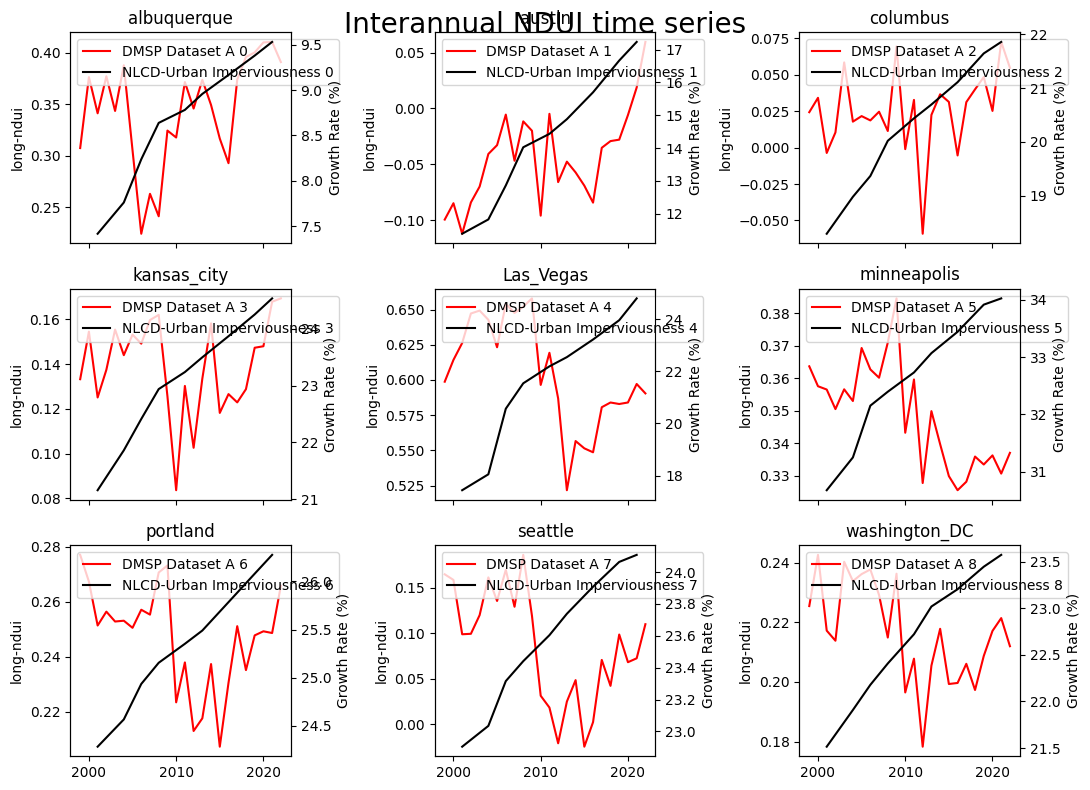

In [17]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 3, figsize=(11, 8), sharex=True)

for i in range(3):
    for j in range(3):
        ax1 = axs[i, j]
        line1 = ax1.plot(du[i * 3 + j].time.dt.year, du[i * 3 + j]['ndui_'+str(city_name[i*3+j])], color='r', label=f'DMSP Dataset A {i * 3 + j}')
        ax1.set_ylabel('long-ndui')

        ax2 = ax1.twinx()
        line3 = ax2.plot(dcg[i * 3 + j].time, dcg[i * 3 + j]['nlcd_'+str(city_name[i*3+j])], color='k', label=f'NLCD-Urban Imperviousness {i * 3 + j}')
        ax2.set_ylabel('Growth Rate (%)')

        lines1, labels1 = ax1.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()

        lines = lines1 + lines2
        labels = labels1 + labels2

        ax1.legend(lines, labels, loc='upper left')
        ax1.set_title(city_name[i*3+j])
plt.tight_layout()
fig.suptitle('Interannual NDUI time series', fontsize=20)
plt.savefig('ndui_time_series.png', dpi=500)

## Subplot for NDUI and NLCD Growth rate

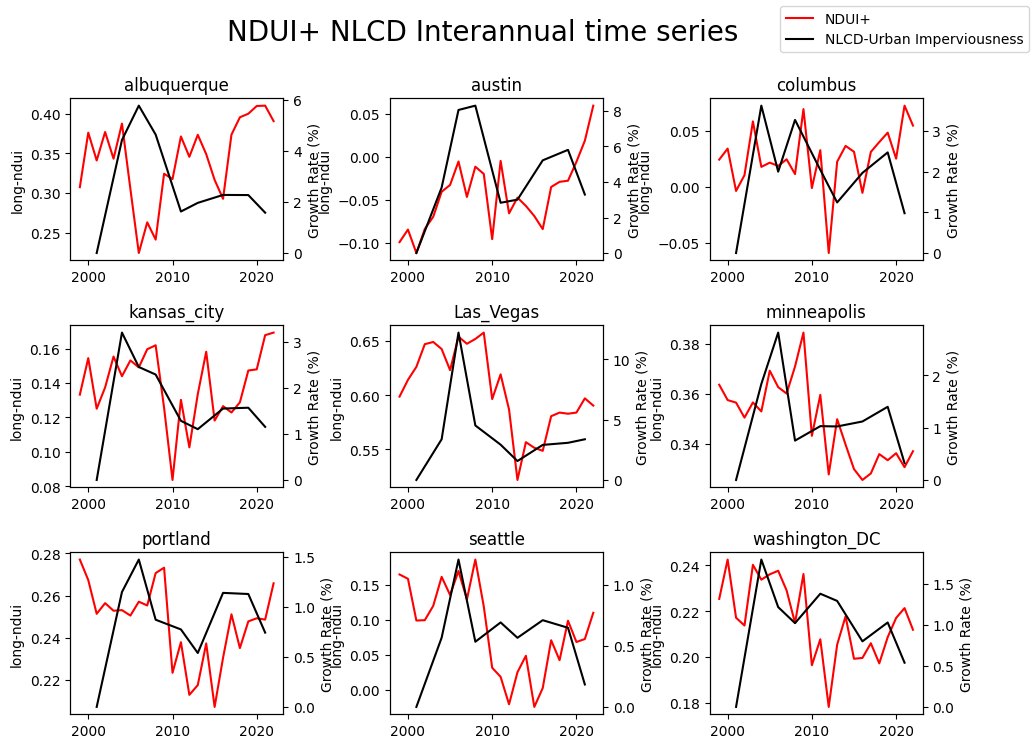

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [24]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 3, figsize=(11, 8))
plt.subplots_adjust(wspace=0.5, hspace=0.4)

for i in range(3):
    for j in range(3):
        ax1 = axs[i, j]
        line1 = ax1.plot(du[i * 3 + j].time.dt.year, du[i * 3 + j]['ndui_'+str(city_name[i*3+j])], color='r', label=f'NDUI+')
        ax1.set_ylabel('long-ndui')

        ax2 = ax1.twinx()
        line3 = ax2.plot(dcg[i * 3 + j].time, dcg[i * 3 + j]['nlcd_'+str(city_name[i*3+j])+'_gwr'], color='k', label=f'NLCD-Urban Imperviousness')
        ax2.set_ylabel('Growth Rate (%)')

        lines1, labels1 = ax1.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()

        lines = lines1 + lines2
        labels = labels1 + labels2

        # ax1.legend(lines, labels, loc='upper left')
        ax1.set_title(city_name[i*3+j])

fig.suptitle('NDUI+ NLCD Interannual time series', fontsize=20)
fig.legend(lines, labels)
plt.savefig('ndui_nlcd_gwr.png', dpi=600, bbox_inches='tight')
plt.show()
from google.colab import files

# Replace 'your_file_name.ext' with the actual file name and extension
files.download('ndui_nlcd_gwr.png')

In [ ]:
#!ls /content/drive/MyDrive/NLCD_data/cities/

In [ ]:
# for i in range(9):
#   dcg[i].to_netcdf('/content/drive/MyDrive/NLCD_data/cities/nlcd_ui_gwr_'+str(city_name[i])+'.nc')

In [19]:
!ls /content/drive/MyDrive/earth_engine/dynamic_world_built_2015_2024.nc

/content/drive/MyDrive/earth_engine/dynamic_world_built_2015_2024.nc


In [20]:
du[1]

<xarray.Dataset> Size: 384B
Dimensions:      (time: 24)
Coordinates:
  * time         (time) datetime64[ns] 192B 1999-01-01 2000-01-01 ... 2022-01-01
Data variables:
    ndui_austin  (time) float64 192B -0.09955 -0.08488 ... 0.01874 0.05961

In [21]:
ds_built = xr.open_dataset('/content/drive/MyDrive/earth_engine/dynamic_world_built_2015_2024.nc').mean(['x', 'y'])
built = ((ds_built.built - ds_built.built.mean(dim='year'))/(ds_built.built.std(dim='year')))* du[1].ndui_austin.std(dim='time') + du[1].ndui_austin.mean(dim='time')
built_ = built.values
time_built = ds_built.year.values
ds_built


<xarray.Dataset> Size: 168B
Dimensions:      (year: 10)
Coordinates:
    spatial_ref  int64 8B ...
  * year         (year) int64 80B 2015 2016 2017 2018 ... 2021 2022 2023 2024
Data variables:
    built        (year) float64 80B 0.4639 0.3933 0.3925 ... 0.4257 0.4253

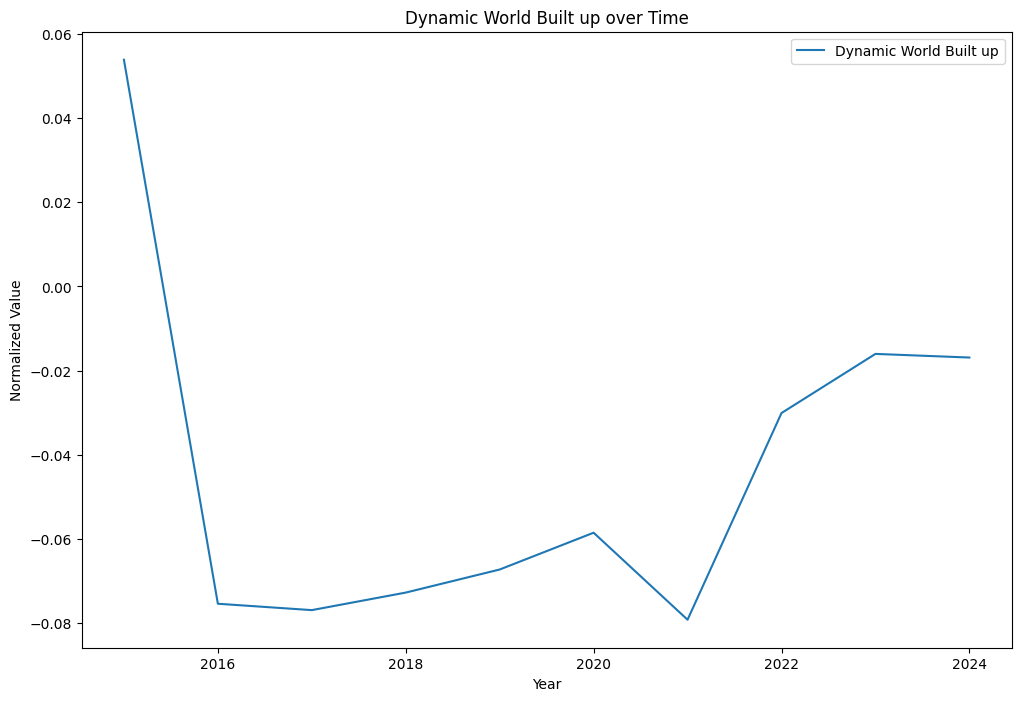

In [25]:
import xarray as xr
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert to pandas DataFrame for Seaborn plotting
df_built = pd.DataFrame({
    'Time': time_built,
    'Dynamic World Built up': built_
})

# Plot using Seaborn
plt.figure(figsize=(12, 8))
sns.lineplot(x='Time', y='Dynamic World Built up', data=df_built, label='Dynamic World Built up')

# Customize the plot
plt.title('Dynamic World Built up over Time')
plt.xlabel('Year')
plt.ylabel('Normalized Value')

plt.legend()
plt.show()

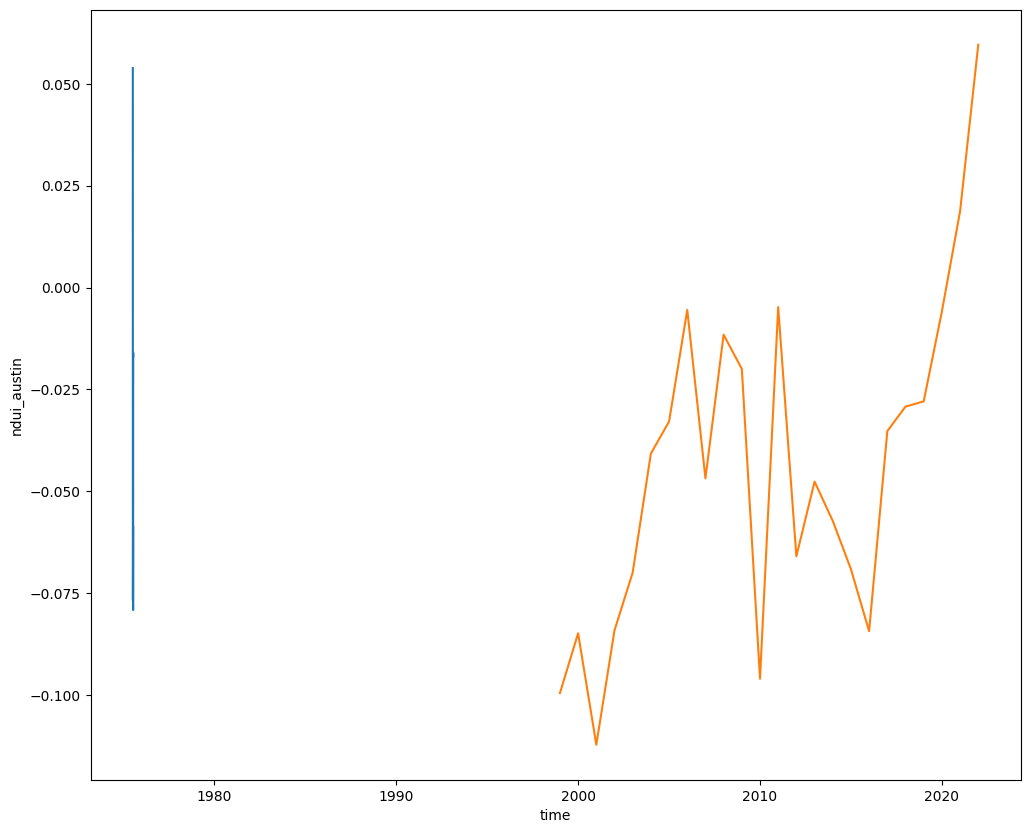

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(12, 10))


built.plot(ax=ax, label='Dynamic World Built up')

du[1].ndui_austin.plot(ax=ax, label='NEXUS')

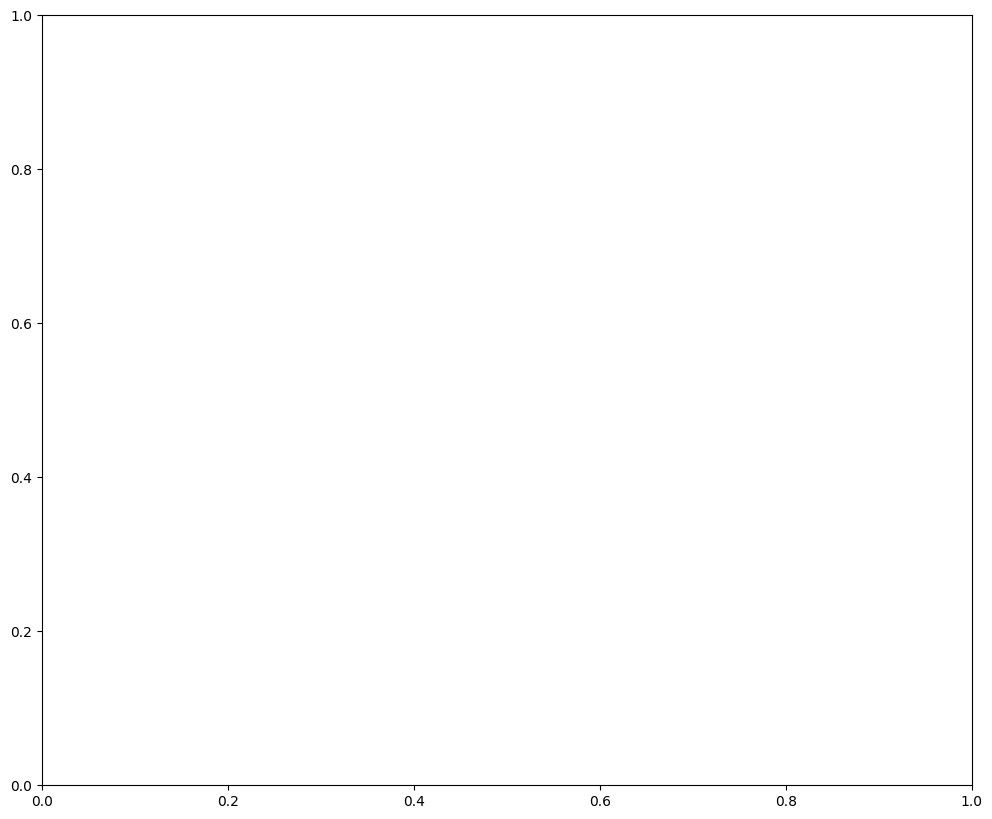

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(12, 10))


AttributeError: 'DataArray' object has no attribute 'vl'

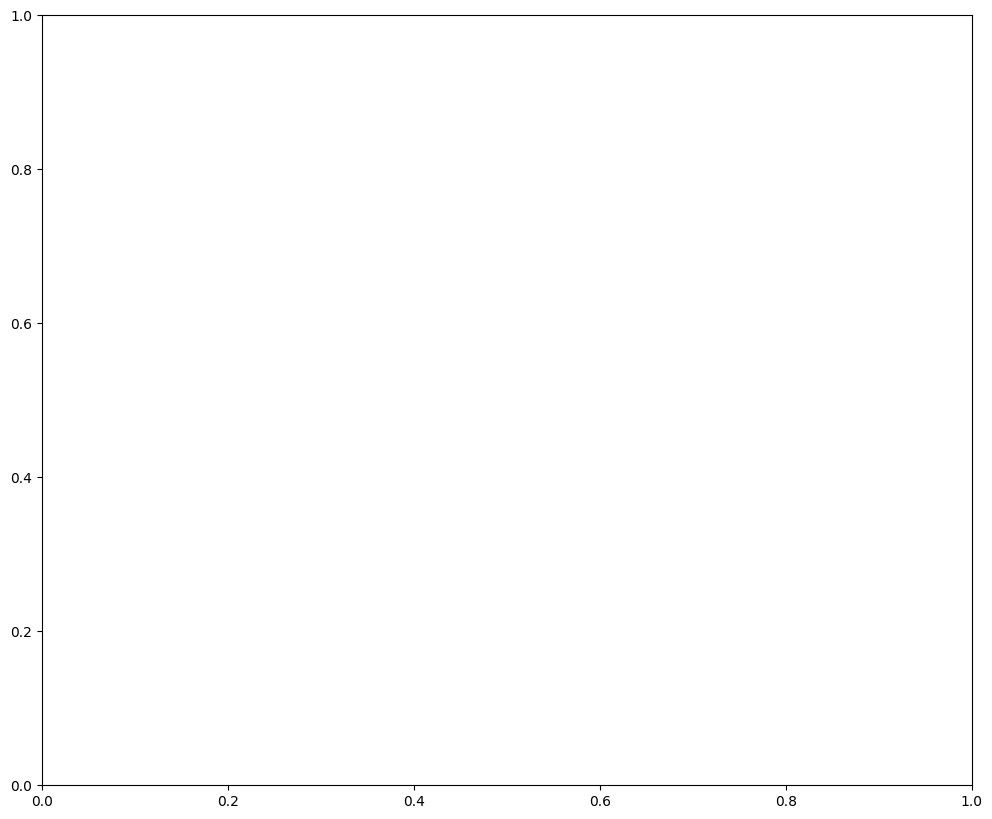

In [28]:
built = built.rename({'year': 'time'})

# Now you can proceed with the plotting
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Normalize the 'built' data and plot
built_normalized = ((built - built.mean(dim='time')) / built.std(dim='time')) * du[1].ndui_austin.std(dim='time').vl + du[1].ndui_austin.mean(dim='time')
built_normalized.plot(ax=ax, label='Dynamic World Built up')

# Plot 'du[1].ndui_austin'
du[1].ndui_austin.plot(ax=ax, label='NEXUS')

# Add labels, title, and legend
ax.set_title('Comparison of Dynamic World Built up and NEXUS Data')
ax.set_xlabel('Time')
ax.set_ylabel('Normalized Value')
ax.legend()

plt.show()

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Rename the 'year' coordinate in 'built' to 'time' so it matches with 'du[1].ndui_austin'
# built = built.rename({'year': 'time'})

# Normalize the 'built' data
built_normalized = ((built - built.mean(dim='time')) / built.std(dim='time')) * du[1].ndui_austin.std(dim='time') + du[1].ndui_austin.mean(dim='time')

# Convert the datasets to pandas DataFrames for Seaborn plotting
df_built = built_normalized.to_dataframe(name='Dynamic World Built up').reset_index()
df_nexus = du[1].ndui_austin.to_dataframe(name='NEXUS').reset_index()

# Combine the dataframes for easier plotting
df_combined = pd.merge(df_built, df_nexus, on='time')

# Plot using Seaborn
plt.figure(figsize=(12, 8))
sns.lineplot(x='time', y='Dynamic World Built up', data=df_combined, label='Dynamic World Built up')
sns.lineplot(x='time', y='NEXUS', data=df_combined, label='NEXUS')

# Add labels, title, and legend
plt.title('Comparison of Dynamic World Built up and NEXUS Data')
plt.xlabel('Time')
plt.ylabel('Normalized Value')
plt.legend()

plt.show()


ValueError: You are trying to merge on int64 and datetime64[ns] columns for key 'time'. If you wish to proceed you should use pd.concat

In [30]:
import xarray as xr
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
ds_built = xr.open_dataset('/content/drive/MyDrive/earth_engine/dynamic_world_built_2015_2024.nc').mean(['x', 'y'])

# Perform the normalization and scaling
built = ((ds_built.built - ds_built.built.mean(dim='year'))/(ds_built.built.std(dim='year'))) * du[1].ndui_austin.std(dim='time') + du[1].ndui_austin.mean(dim='time')

# Extract the values and time coordinates for both datasets
built_ = built.values
time_built = ds_built.year.values

ndui_values = du[1].ndui_austin.values
time_ndui = du[1].time.values

# Convert to pandas DataFrames for Seaborn plotting
df_built = pd.DataFrame({
    'Time': time_built,
    'Dynamic World Built up': built_
})

df_ndui = pd.DataFrame({
    'Time': time_ndui,
    'NEXUS': ndui_values
})

# Merge the DataFrames on the 'Time' column
df_combined = pd.merge(df_built, df_ndui, on='Time', how='outer')

# Plot using Seaborn
plt.figure(figsize=(12, 8))
sns.lineplot(x='Time', y='Dynamic World Built up', data=df_combined, label='Dynamic World Built up')
sns.lineplot(x='Time', y='NEXUS', data=df_combined, label='NEXUS')

# Customize the plot
plt.title('Comparison of Dynamic World Built up and NEXUS Data over Time')
plt.xlabel('Time')
plt.ylabel('Normalized Value')
plt.legend()

plt.show()

ValueError: You are trying to merge on int64 and datetime64[ns] columns for key 'Time'. If you wish to proceed you should use pd.concat

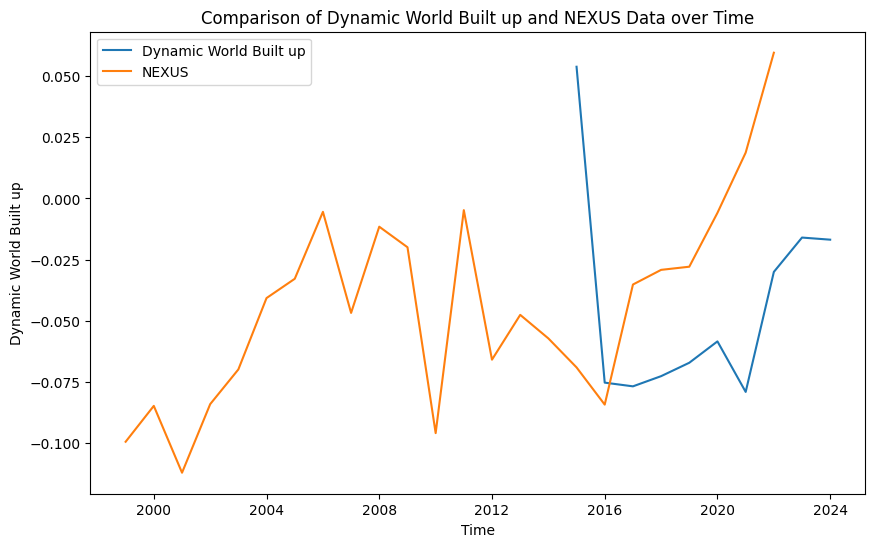

In [ ]:
import xarray as xr
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
ds_built = xr.open_dataset('/content/drive/MyDrive/earth_engine/dynamic_world_built_2015_2024.nc').mean(['x', 'y'])

# Perform the normalization and scaling
built = ((ds_built.built - ds_built.built.mean(dim='year'))/(ds_built.built.std(dim='year'))) * du[1].ndui_austin.std(dim='time') + du[1].ndui_austin.mean(dim='time')

# Extract the values and time coordinates for both datasets
built_ = built.values
time_built = ds_built.year.values

ndui_values = du[1].ndui_austin.values
time_ndui = du[1].time.values

# Convert the time_built (which is int) to datetime format to match time_ndui
time_built = pd.to_datetime(time_built, format='%Y')

# Convert to pandas DataFrames for Seaborn plotting
df_built = pd.DataFrame({
    'Time': time_built,
    'Dynamic World Built up': built_
})

df_ndui = pd.DataFrame({
    'Time': time_ndui,
    'NEXUS': ndui_values
})

# Merge the DataFrames on the 'Time' column
df_combined = pd.merge(df_built, df_ndui, on='Time', how='outer')

# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='Time', y='Dynamic World Built up', data=df_combined, label='Dynamic World Built up')
sns.lineplot(x='Time', y='NEXUS', data=df_combined, label='NEXUS')

# Customize the plot
plt.title('Comparison of Dynamic World Built up and NEXUS Data over Time')
plt.xlabel('Time')
plt.legend()

plt.show()

In [ ]:
ds_built

<xarray.Dataset> Size: 168B
Dimensions:      (year: 10)
Coordinates:
    spatial_ref  int64 8B ...
  * year         (year) int64 80B 2015 2016 2017 2018 ... 2021 2022 2023 2024
Data variables:
    built        (year) float64 80B 0.4639 0.3933 0.3925 ... 0.4257 0.4253

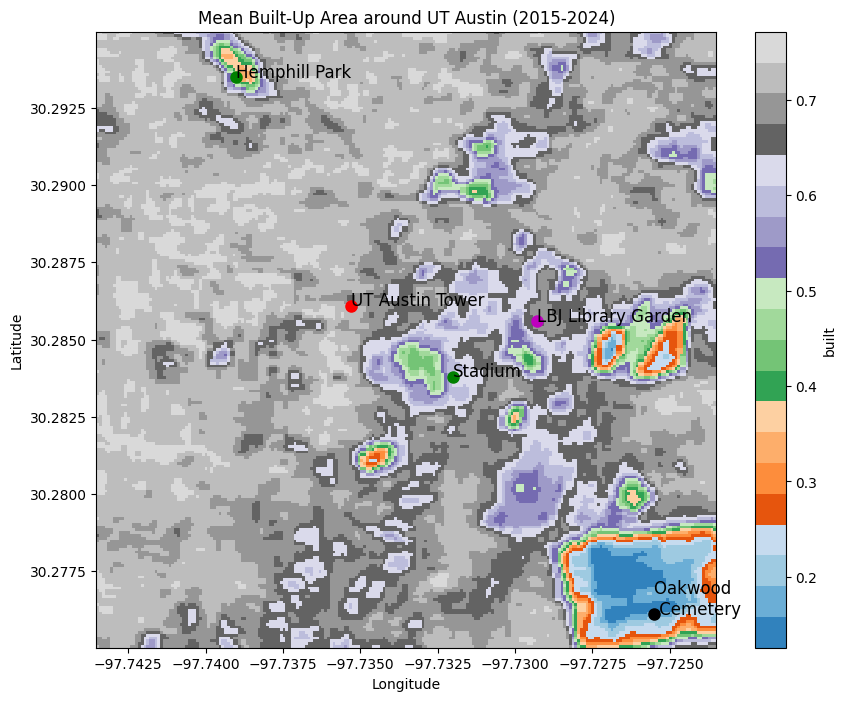

In [31]:
import xarray as xr
import matplotlib.pyplot as plt

# Load the dataset
ds_built = xr.open_dataset('/content/drive/MyDrive/earth_engine/dynamic_world_built_2015_2024.nc')

# Select the area around UT Austin
latitude = 30.2850
longitude = -97.7335

ds_built_selected = ds_built.built.mean(dim='year').sel(
    y=slice(latitude + 0.01, latitude - 0.01),
    x=slice(longitude - 0.01, longitude + 0.01)
)

# Plot the selected area
plt.figure(figsize=(10, 8))
ax = plt.gca()
ds_built_selected.plot(ax=ax, cmap='tab20c')

# Mark UT Austin Tower
plt.plot(-97.7353, 30.2861, 'ro', markersize=8)  # Approximate coordinates
plt.text(-97.7353, 30.2861, 'UT Austin Tower', color='black', fontsize=12)

# Mark the garden (LBJ Presidential Library Garden)
plt.plot(-97.7293, 30.2856, 'mo', markersize=8)  # Approximate coordinates
plt.text(-97.7293, 30.2856, 'LBJ Library Garden', color='black', fontsize=12)

# Mark the stadium (Darrell K Royal–Texas Memorial Stadium)
plt.plot(-97.7320, 30.2838, 'go', markersize=8)  # Approximate coordinates
plt.text(-97.7320, 30.2838, 'Stadium', color='black', fontsize=12)
# Mark Hemphill Park
plt.plot(-97.739, 30.2935, 'go', markersize=8)  # Approximate coordinates
plt.text(-97.739, 30.2935, 'Hemphill Park', color='black', fontsize=12)

# Mark Oakwood Cemetery
plt.plot(-97.7255, 30.2761, 'ko', markersize=8)  # Approximate coordinates
plt.text(-97.7255, 30.2761, 'Oakwood \n Cemetery', color='black', fontsize=12)

plt.title('Mean Built-Up Area around UT Austin (2015-2024)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [ ]:
!ls /content/drive/MyDrive/long_ndui/austin/ndui_austin_1999_2022.nc

/content/drive/MyDrive/long_ndui/austin/ndui_austin_1999_2022.nc


In [ ]:
ds_ndui = xr.open_dataset('/content/drive/MyDrive/long_ndui/austin/ndui_austin_1999_2022.nc')
ds_ndui

<xarray.Dataset> Size: 662MB
Dimensions:  (lat: 1857, lon: 1857, time: 24)
Coordinates:
  * lat      (lat) float64 15kB 30.52 30.52 30.52 30.52 ... 30.02 30.02 30.02
  * lon      (lon) float64 15kB -97.99 -97.99 -97.99 ... -97.49 -97.49 -97.49
  * time     (time) datetime64[ns] 192B 1999-01-01 2000-01-01 ... 2022-01-01
Data variables:
    ndui     (time, lat, lon) float64 662MB ...

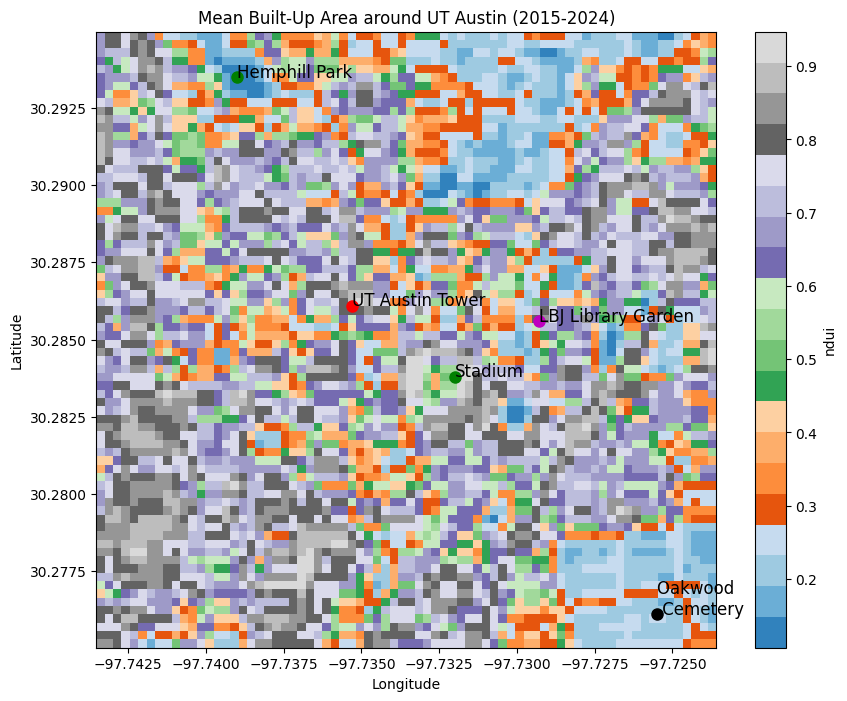

In [32]:
import xarray as xr
import matplotlib.pyplot as plt

# Load the dataset
ds_ndui = xr.open_dataset('/content/drive/MyDrive/long_ndui/austin/ndui_austin_1999_2022.nc')

# Select the area around UT Austin
latitude = 30.2850
longitude = -97.7335

ds_built_selected = ds_ndui.ndui.mean(dim='time').sel(
    lat=slice(latitude + 0.01, latitude - 0.01),
    lon=slice(longitude - 0.01, longitude + 0.01)
)

# Plot the selected area
plt.figure(figsize=(10, 8))
ax = plt.gca()
ds_built_selected.plot(ax=ax, cmap='tab20c')

# Mark UT Austin Tower
plt.plot(-97.7353, 30.2861, 'ro', markersize=8)  # Approximate coordinates
plt.text(-97.7353, 30.2861, 'UT Austin Tower', color='black', fontsize=12)

# Mark the garden (LBJ Presidential Library Garden)
plt.plot(-97.7293, 30.2856, 'mo', markersize=8)  # Approximate coordinates
plt.text(-97.7293, 30.2856, 'LBJ Library Garden', color='black', fontsize=12)

# Mark the stadium (Darrell K Royal–Texas Memorial Stadium)
plt.plot(-97.7320, 30.2838, 'go', markersize=8)  # Approximate coordinates
plt.text(-97.7320, 30.2838, 'Stadium', color='black', fontsize=12)

# Mark Hemphill Park
plt.plot(-97.739, 30.2935, 'go', markersize=8)  # Approximate coordinates
plt.text(-97.739, 30.2935, 'Hemphill Park', color='black', fontsize=12)

# Mark Oakwood Cemetery
plt.plot(-97.7255, 30.2761, 'ko', markersize=8)  # Approximate coordinates
plt.text(-97.7255, 30.2761, 'Oakwood \n Cemetery', color='black', fontsize=12)

plt.title('Mean Built-Up Area around UT Austin (2015-2024)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

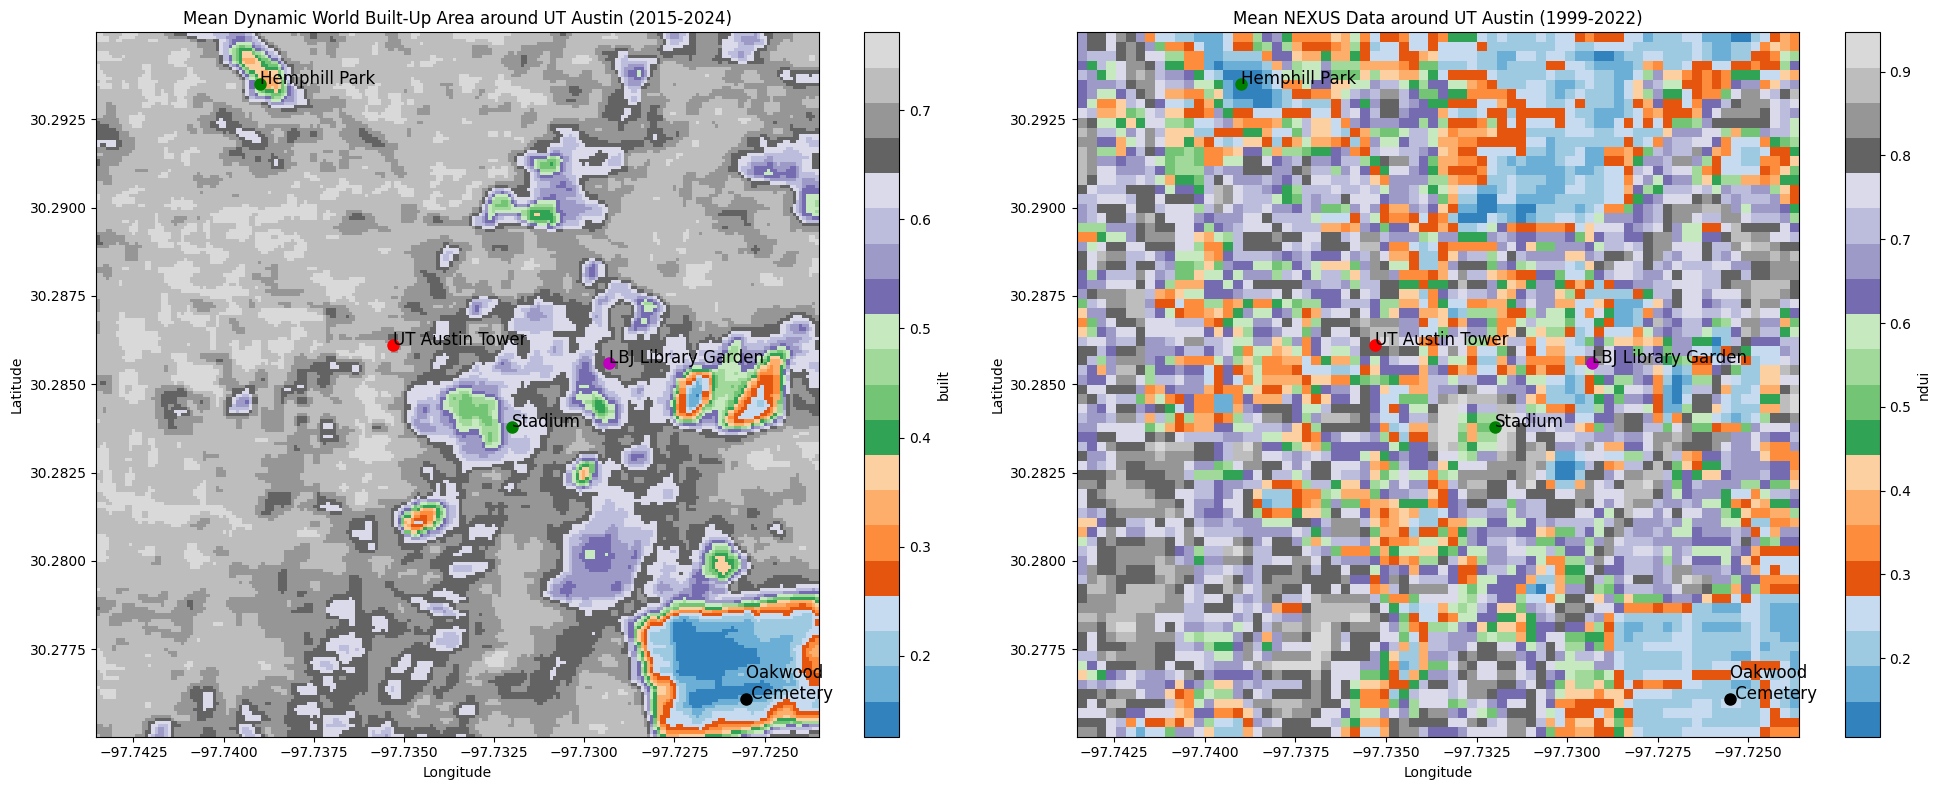

In [33]:
import xarray as xr
import matplotlib.pyplot as plt

# Load the first dataset
ds_built = xr.open_dataset('/content/drive/MyDrive/earth_engine/dynamic_world_built_2015_2024.nc')

# Load the second dataset
ds_ndui = xr.open_dataset('/content/drive/MyDrive/long_ndui/austin/ndui_austin_1999_2022.nc')

# Select the area around UT Austin for both datasets
latitude = 30.2850
longitude = -97.7335

ds_built_selected = ds_built.built.mean(dim='year').sel(
    y=slice(latitude + 0.01, latitude - 0.01),
    x=slice(longitude - 0.01, longitude + 0.01)
)

ds_ndui_selected = ds_ndui.ndui.mean(dim='time').sel(
    lat=slice(latitude + 0.01, latitude - 0.01),
    lon=slice(longitude - 0.01, longitude + 0.01)
)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plot the first selected area (Built-Up Area)
ds_built_selected.plot(ax=ax1, cmap='tab20c')
ax1.plot(-97.7353, 30.2861, 'ro', markersize=8)
ax1.text(-97.7353, 30.2861, 'UT Austin Tower', color='black', fontsize=12)
ax1.plot(-97.7293, 30.2856, 'mo', markersize=8)
ax1.text(-97.7293, 30.2856, 'LBJ Library Garden', color='black', fontsize=12)
ax1.plot(-97.7320, 30.2838, 'go', markersize=8)
ax1.text(-97.7320, 30.2838, 'Stadium', color='black', fontsize=12)
ax1.plot(-97.739, 30.2935, 'go', markersize=8)
ax1.text(-97.739, 30.2935, 'Hemphill Park', color='black', fontsize=12)
ax1.plot(-97.7255, 30.2761, 'ko', markersize=8)
ax1.text(-97.7255, 30.2761, 'Oakwood \n Cemetery', color='black', fontsize=12)
ax1.set_title('Mean Dynamic World Built-Up Area around UT Austin (2015-2024)')
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')

# Plot the second selected area (NDUI Data)
ds_ndui_selected.plot(ax=ax2, cmap='tab20c')
ax2.plot(-97.7353, 30.2861, 'ro', markersize=8)
ax2.text(-97.7353, 30.2861, 'UT Austin Tower', color='black', fontsize=12)
ax2.plot(-97.7293, 30.2856, 'mo', markersize=8)
ax2.text(-97.7293, 30.2856, 'LBJ Library Garden', color='black', fontsize=12)
ax2.plot(-97.7320, 30.2838, 'go', markersize=8)
ax2.text(-97.7320, 30.2838, 'Stadium', color='black', fontsize=12)
ax2.plot(-97.739, 30.2935, 'go', markersize=8)
ax2.text(-97.739, 30.2935, 'Hemphill Park', color='black', fontsize=12)
ax2.plot(-97.7255, 30.2761, 'ko', markersize=8)
ax2.text(-97.7255, 30.2761, 'Oakwood \n Cemetery', color='black', fontsize=12)
ax2.set_title('Mean NDUI+ Data around UT Austin (1999-2022)')
ax2.set_xlabel('Longitude')
ax2.set_ylabel('Latitude')

plt.tight_layout()
plt.savefig('dynamic_world_validation.png', dpi=500)

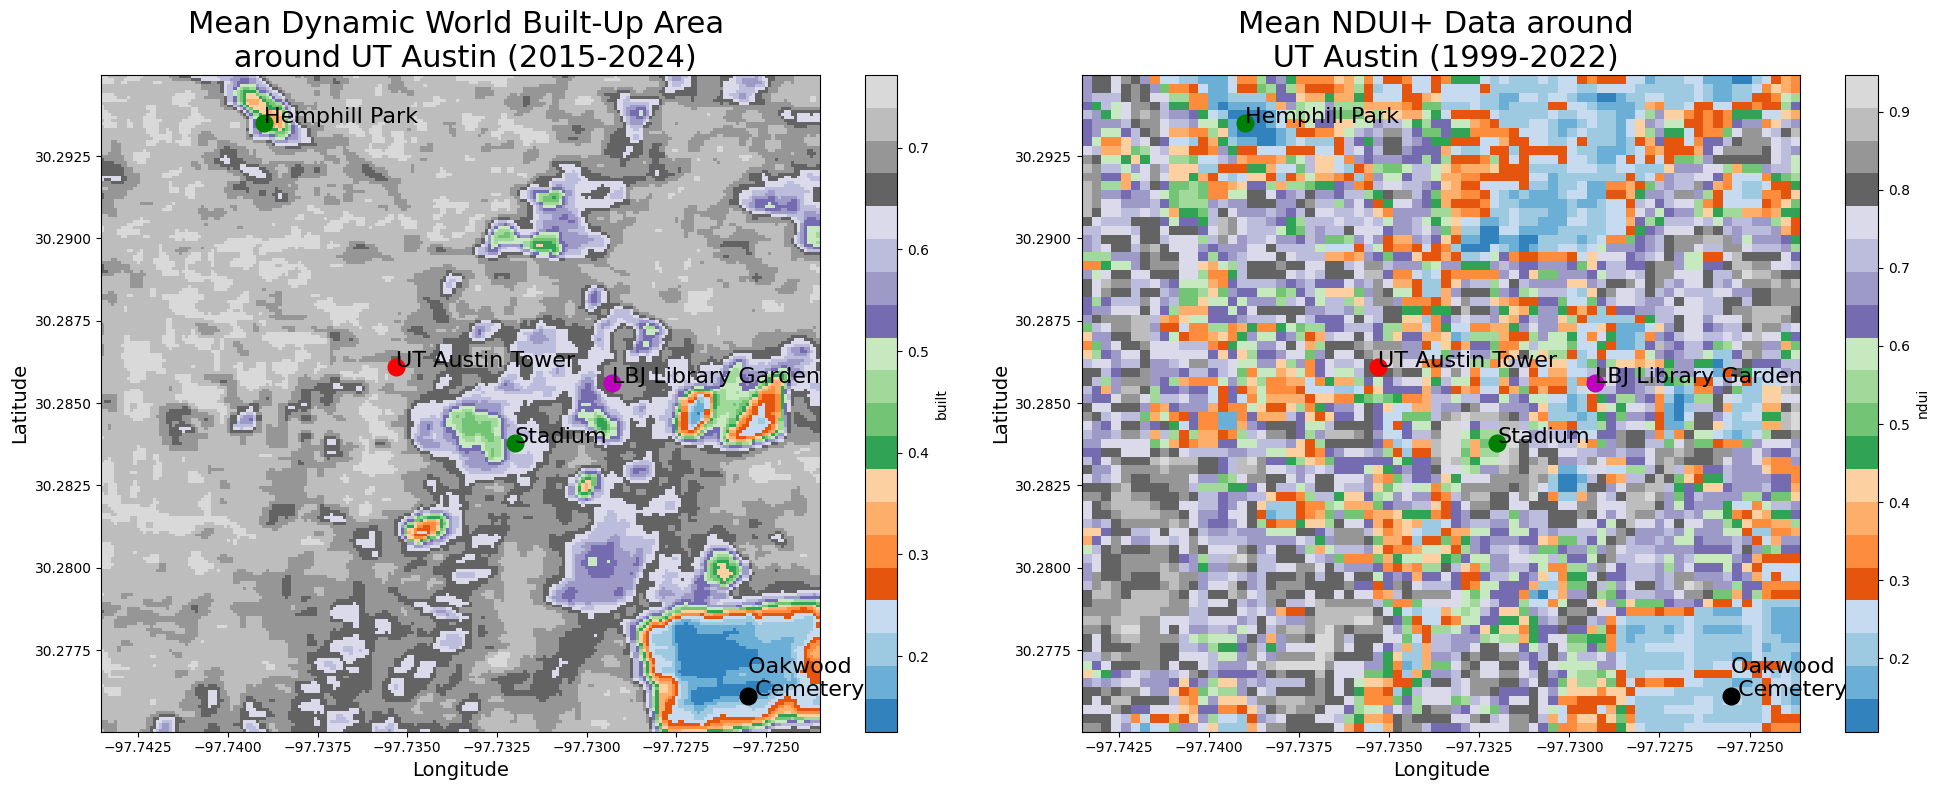

In [35]:
import xarray as xr
import matplotlib.pyplot as plt

# Load the first dataset
ds_built = xr.open_dataset('/content/drive/MyDrive/earth_engine/dynamic_world_built_2015_2024.nc')

# Load the second dataset
ds_ndui = xr.open_dataset('/content/drive/MyDrive/long_ndui/austin/ndui_austin_1999_2022.nc')

# Select the area around UT Austin for both datasets
latitude = 30.2850
longitude = -97.7335

ds_built_selected = ds_built.built.mean(dim='year').sel(
    y=slice(latitude + 0.01, latitude - 0.01),
    x=slice(longitude - 0.01, longitude + 0.01)
)

ds_ndui_selected = ds_ndui.ndui.mean(dim='time').sel(
    lat=slice(latitude + 0.01, latitude - 0.01),
    lon=slice(longitude - 0.01, longitude + 0.01)
)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Increase font size for labels and title
font_size = 16
label_size = 14
title_size = 22

# Plot the first selected area (Built-Up Area)
ds_built_selected.plot(ax=ax1, cmap='tab20c')
ax1.plot(-97.7353, 30.2861, 'ro', markersize=12)
ax1.text(-97.7353, 30.2861, 'UT Austin Tower', color='black', fontsize=font_size)
ax1.plot(-97.7293, 30.2856, 'mo', markersize=12)
ax1.text(-97.7293, 30.2856, 'LBJ Library Garden', color='black', fontsize=font_size)
ax1.plot(-97.7320, 30.2838, 'go', markersize=12)
ax1.text(-97.7320, 30.2838, 'Stadium', color='black', fontsize=font_size)
ax1.plot(-97.739, 30.2935, 'go', markersize=12)
ax1.text(-97.739, 30.2935, 'Hemphill Park', color='black', fontsize=font_size)
ax1.plot(-97.7255, 30.2761, 'ko', markersize=12)
ax1.text(-97.7255, 30.2761, 'Oakwood \n Cemetery', color='black', fontsize=font_size)
ax1.set_title('Mean Dynamic World Built-Up Area \n around UT Austin (2015-2024)', fontsize=title_size)
ax1.set_xlabel('Longitude', fontsize=label_size)
ax1.set_ylabel('Latitude', fontsize=label_size)

# Plot the second selected area (NDUI Data)
ds_ndui_selected.plot(ax=ax2, cmap='tab20c')
ax2.plot(-97.7353, 30.2861, 'ro', markersize=12)
ax2.text(-97.7353, 30.2861, 'UT Austin Tower', color='black', fontsize=font_size)
ax2.plot(-97.7293, 30.2856, 'mo', markersize=12)
ax2.text(-97.7293, 30.2856, 'LBJ Library Garden', color='black', fontsize=font_size)
ax2.plot(-97.7320, 30.2838, 'go', markersize=12)
ax2.text(-97.7320, 30.2838, 'Stadium', color='black', fontsize=font_size)
ax2.plot(-97.739, 30.2935, 'go', markersize=12)
ax2.text(-97.739, 30.2935, 'Hemphill Park', color='black', fontsize=font_size)
ax2.plot(-97.7255, 30.2761, 'ko', markersize=12)
ax2.text(-97.7255, 30.2761, 'Oakwood \n Cemetery', color='black', fontsize=font_size)
ax2.set_title('Mean NDUI+ Data around \n UT Austin (1999-2022)', fontsize=title_size)
ax2.set_xlabel('Longitude', fontsize=label_size)
ax2.set_ylabel('Latitude', fontsize=label_size)

plt.tight_layout()
plt.savefig('dynamic_world_validation.png', dpi=500)